In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
train = pd.read_csv('labeledTrainData.tsv',quoting=3,header=0,delimiter='\t')
test = pd.read_csv('testData.tsv',quoting=3,header=0,delimiter='\t')
all_data = pd.read_csv('unlabeledTrainData.tsv',quoting=3,header=0,delimiter='\t')

In [3]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
train.review[0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [5]:
def clean_review(movie_review):
    #Remove HTML tags
    review = BeautifulSoup(movie_review,"lxml").get_text()
    
    #Remove non-alphabets
    review = re.sub("[^a-zA-Z]"," ",review)
    return review.lower().split()

In [6]:
trainReview = [clean_review(review) for review in train.review]
testReview = [clean_review(review) for review in test.review]
all_dataReview = [clean_review(review) for review in all_data.review]

In [7]:
vocab = trainReview + all_dataReview

In [8]:
from gensim.models import Word2Vec
vec = Word2Vec(size=100, window=8, min_count=10)
vec.build_vocab(vocab)

In [ ]:
vec.train(vocab)
vec.save('word2vec.w2v')

In [9]:
vec = Word2Vec.load('word2vec.w2v')

In [10]:
vec.most_similar('happy')

[(u'satisfied', 0.5956597328186035),
 (u'sad', 0.549846351146698),
 (u'grateful', 0.5493713617324829),
 (u'lucky', 0.5319870710372925),
 (u'proud', 0.5263656377792358),
 (u'upset', 0.5063146948814392),
 (u'afraid', 0.4847458302974701),
 (u'gonna', 0.4839704632759094),
 (u'saddened', 0.48121848702430725),
 (u'pleased', 0.48070013523101807)]

In [11]:
len(vec.index2word)

34118

In [12]:
vocab = set(vec.index2word)
def getWordVectorAverage(review):
    count = 0
    ans = np.zeros(100)
    for word in review:
        if word in vocab:
            ans += vec[word]
            count += 1
    if(count == 0):
        return ans
    return ans / count

In [13]:
X_train = [getWordVectorAverage(review) for review in trainReview]
X_test = [getWordVectorAverage(review) for review in testReview]

In [14]:
from models import MLP
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = train.sentiment.values

In [16]:
from sklearn.cross_validation import train_test_split
X1,X2,y1,y2 = train_test_split(X_train,y_train,test_size=0.3)

In [17]:
input_size=100
hiddenSize1=60
hiddenSize2 = 30
output_size=2
model = MLP(input_size,hiddenSize1,hiddenSize2,output_size,hiddenLayer='relu')

In [18]:
model.train(X1,y1,X_val=X2,y_val=y2,n_iters=10000,learning_rate=4e-3,opt='momentum')

Iteration 0, loss = 1.515397
Validation Accuracy :0.495867
Iteration 500, loss = 0.410136
Validation Accuracy :0.832800
Iteration 1000, loss = 0.400866
Validation Accuracy :0.853600
Iteration 1500, loss = 0.338523
Validation Accuracy :0.865333
Iteration 2000, loss = 0.320454
Validation Accuracy :0.865733
Iteration 2500, loss = 0.368896
Validation Accuracy :0.868667
Iteration 3000, loss = 0.312390
Validation Accuracy :0.869200
Iteration 3500, loss = 0.294429
Validation Accuracy :0.871067
Iteration 4000, loss = 0.347997
Validation Accuracy :0.870667
Iteration 4500, loss = 0.338491
Validation Accuracy :0.870267
Iteration 5000, loss = 0.335662
Validation Accuracy :0.871600
Iteration 5500, loss = 0.349362
Validation Accuracy :0.869600
Iteration 6000, loss = 0.286980
Validation Accuracy :0.872800
Iteration 6500, loss = 0.332802
Validation Accuracy :0.872667
Iteration 7000, loss = 0.361660
Validation Accuracy :0.873467
Iteration 7500, loss = 0.314364
Validation Accuracy :0.873867
Iteration 80

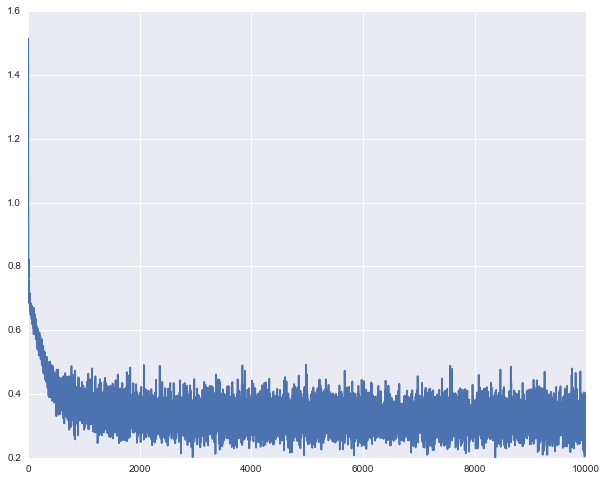

In [19]:
plt.plot(model.loss_history)

In [20]:
model.train(X_train,y_train,n_iters=10000,learning_rate=4e-3,opt='momentum')

Iteration 0, loss = 0.323256
Iteration 500, loss = 0.330103
Iteration 1000, loss = 0.327119
Iteration 1500, loss = 0.273391
Iteration 2000, loss = 0.238053
Iteration 2500, loss = 0.221127
Iteration 3000, loss = 0.384681
Iteration 3500, loss = 0.330963
Iteration 4000, loss = 0.289163
Iteration 4500, loss = 0.222092
Iteration 5000, loss = 0.326614
Iteration 5500, loss = 0.289439
Iteration 6000, loss = 0.279050
Iteration 6500, loss = 0.275837
Iteration 7000, loss = 0.291432
Iteration 7500, loss = 0.265235
Iteration 8000, loss = 0.344724
Iteration 8500, loss = 0.240434
Iteration 9000, loss = 0.287905
Iteration 9500, loss = 0.290310


In [21]:
result = model.predict(X_test)

In [22]:
result

array([1, 0, 1, ..., 0, 1, 1])

In [23]:
output = pd.DataFrame(data={"id":test["id"],"sentiment":result})

In [24]:
output.to_csv("W2V-Average.csv",index=False,quoting=3)

Got 0.86560 on Kaggle